## Profit Optimization: Customers and Products Analysis Using SQL (Scale Model Cars)

## Table of Contents

- [Introduction](#Introduction)
- [Data Schema for Scale Model Cars Database](#Data-Schema-for-Scale-Model-Cars-Database)
  - [Display the schema from file path](#Display-the-schema-from-file-path)
  - [Data Structure and Relationships](#Data-Structure-and-Relationships)
- [Exploring the Data](#Exploring-the-Data)
- [Stock Order Quantity Analysis](#Stock-Order-Quantity-Analysis)
- [Marketing Strategies and Consumer Behavior](#Marketing-Strategies-and-Consumer-Behavior)
- [Customer Lifetime Value Analysis](#Customer-Lifetime-Value-Analysis)
  - [Average Contribution of Customer Lifetime Value](#Average-Contribution-of-Customer-Lifetime-Value) 
- [Profitable Product Lines](#Profitable-Product-Lines)
- [Sales Team Portfolio](#Sales-Team-Portfolio)
- [Year-Over-Year Profit Margins](#Year-Over-Year-Profit-Margins)
- [Conclusion](#Conclusion)   

## Introduction

Data analysis has proven to be very effective in sales. This is because we can extract key performance indicators (KPIs) to make smarter decisions. This saves time, resources, and money. In our analysis, we're going to analyze customer and products for Scale Model Cars Store to try and discover some insights that can provide valuable information to help store make smarter decisions. We will categorised our analysis into 6 different varialbes that are key performance indicators(KPIs). Furthermore, based on the findings, we will give data-driven recommendations on how to optimise the KPIs to enhance better results. We have categorized our analysis into 6 sections i.e.;
- Stock Order Quantity
- Marketing Strategies and Consumer Behaviour
- Customer Lifetime Value
- Profitable Product Lines
- Sales Team Portfolio
- Year-Over-Year Profit Margins

In [6]:
# Importing all the necessary libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

## Data Schema for Scale Model Cars Database
___

We will use the `Ipython.display` module to display the data schema for the Scale Model Cars to get a visual representation of the tables in the database and how they are related.

### Display the schema from file path

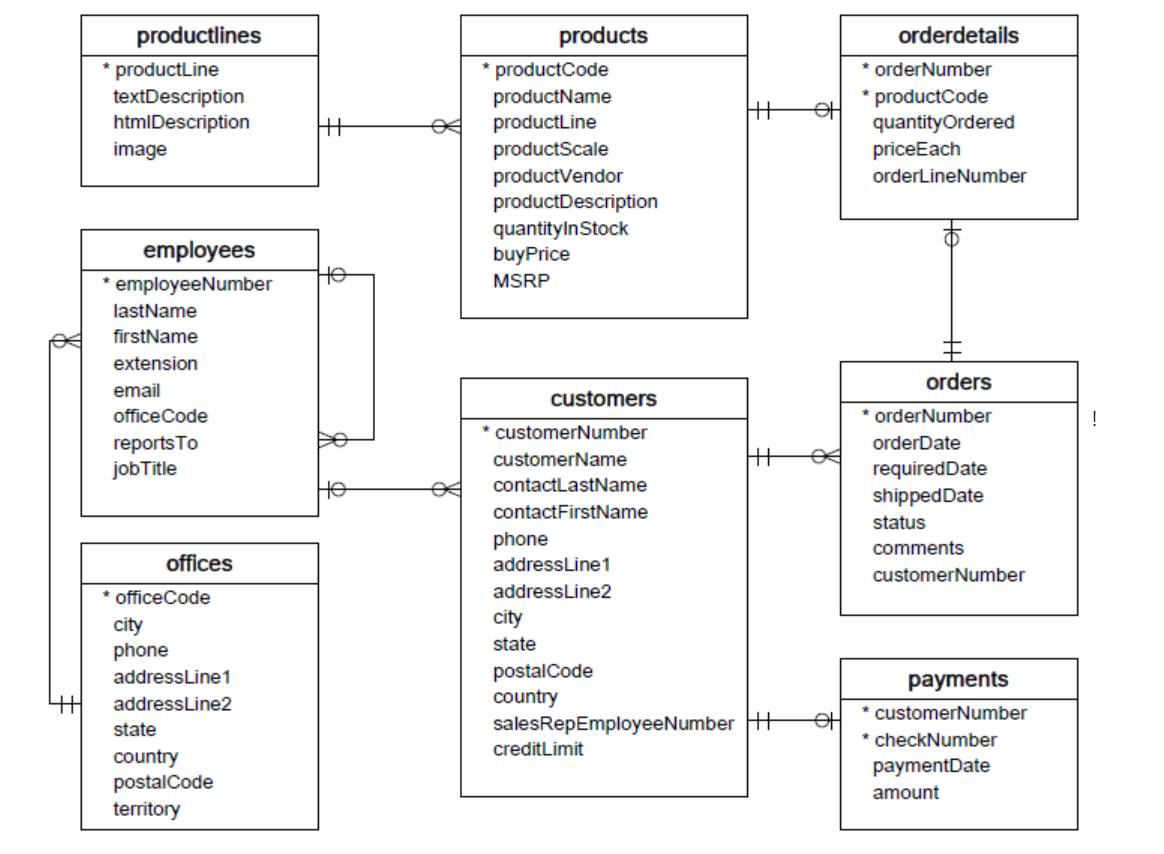

In [10]:
Image('C:/Users/Yvonne/schema.PNG', width=700)

### Data Structure and Relationships

From the above schema, (which can also be found [here](https://www.mysqltutorial.org/getting-started-with-mysql/mysql-sample-database/)), we will go ahead to describe the database, and how the above tables link to each other.

**Table 1:** `customers`
___
- **Fields**
    - customerNumber
    - customerName
    - contactLastName
    - contactFirstName
    - phone
    - addressLine1
    - addressLine2
    - city
    - state
    - postalCode
    - country
    - salesRepEmployeeNumber
    - creditLimit
  ___

* Primary Key **`customerNumber`**
* Foreign Key: **`salesRepEmployeeNumber`** references **`employees`** on **`employeeNumber`**

**Table 2:** `employees`
___
- **Fields**
    - employeeNumber
    - lastName
    - firstName
    - extension
    - email
    - officeCode
    - reportsTo
    - jobTitle
___
1. Primary Key **`employeeNumber`**
2. Foreign Key: **`reportsTo`** references **`employees`** on **`employeeNumber`**
3. Foreign Key: **`officeCode`** references **`offices`** on **`officeCode`**

**Table 3:** `offices`
___
- **Fields**
    - officeCode
    - city
    - phone
    - addressLine1
    - addressLine2
    - state
    - country
    - postalCode
    - territory
___
* Primary Key **`officeCode`**

**Table 4:** `orderdetails`
___
- **Fields**
    - orderNumber
    - productCode
    - quantityOrdered
    - priceEach
    - orderLineNumber
___
* Primary Key **`orderNumber`** and **`productCode`**
* Foreign Key **`orderNumber`** references **`orders`** on **`orderNumber`**
* Foreign Key **`productCode`** references **`products`** on **`productCode`**

**Table 5:** `orders`
___
- **Fields**
    - orderNumber
    - orderDate
    - requiredDate
    - shippedDate
    - status
    - comment
    - customerNumber
___
* Primary Key **`orderNumber`**
* Foreign Key **`customerNumber`** references **`customers`** on **`customerNumber`**

**Table 6:** `payments`
___
- **Fields**
    - customerNumber
    - checkNumber
    - paymentDate
    - amount
___
* Primary Key **`customerNumber`** and **`checkNumber`**
* Foreign Key **`customerNumber`** references **`customers`** on **`customerNumber`**

**Table 7:** `productlines`
___
- **Fields**
    - productLine
    - textDescription
    - htmlDescription
    - image
___
* Primary Key **`productLine`**

**Table 8:** `products`
___
- **Fields**
    - productCode
    - productName
    - productLine
    - productScale
    - productVendor
    - productDescription
    - quantityInStore
    - buyPrice
    - MSRP
___
* Primary Key **`productCode`**
* Foreign Key **`productLine`** references **`productlines`** on **`productLine`**

In [21]:
conn = sqlite3.connect('stores.db')

## Exploring the Data
___

To determine the number of fields(columns) and records(rows) in our database, we're going to merger the table using the **UNION ALL** set operator

In [24]:
query_union = '''
SELECT 'Customers' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('customers')) AS number_of_attributes,(SELECT COUNT(*)
              FROM customers) AS number_of_rows

UNION ALL

SELECT 'Products' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('products')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM products) AS number_of_rows
         
UNION ALL

SELECT 'ProductLines' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('productlines')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM productlines) AS number_of_rows
         
UNION ALL

SELECT 'Orders' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('orders')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM orders) AS number_of_rows
         
UNION ALL

SELECT 'OrderDetails' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('orderdetails')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM orderdetails) AS number_of_rows
         
UNION ALL

SELECT 'Payments' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('payments')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM payments) AS number_of_rows
         
UNION ALL

SELECT 'Employees' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('employees')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM employees) AS number_of_rows
         
UNION ALL

SELECT 'Offices' AS table_name,
       (SELECT COUNT(*)
          FROM pragma_table_info('offices')) AS number_of_attributes,
       (SELECT COUNT(*)
          FROM offices) AS number_of_rows '''
df_1 = pd.read_sql_query(query_union, conn)
df_1

,table_name,number_of_attributes,number_of_rows
0,Customers,13,122
1,Products,9,110
2,ProductLines,4,7
3,Orders,7,326
4,OrderDetails,5,2996
5,Payments,4,273
6,Employees,8,23
7,Offices,9,7


From the finding above, we can observe that each table has different number of fields and records. __OrderDetails__ table has the highest number of rows of almost 3000 records.

## Stock Order Quantity Analysis
___

Stock levels are an indicator of a product's demand and supply pattern and therefore analysis should be conducted to generate inventory reports that indicate two key metrics i.e;
- low stock(product in demand)
- product performance
Access to this information will ensure absolute optimization of supply and the user experience by preventing the best-selling products from going out-of-stock. Below, we are going to write a query that will generate the findings of products that should be ordered according to the demand patterns.

In [28]:
query_stock = '''
WITH
low_stock_table AS (
    SELECT
        p.productCode,
        ROUND(SUM(od.quantityOrdered) / p.quantityInStock, 2) AS low_stock_ratio
    FROM products p
    JOIN orderdetails od
        ON p.productCode = od.productCode
    WHERE p.quantityInStock > 0
    GROUP BY p.productCode
),    
       
product_performance_table AS (
    SELECT
        od.productCode,
        SUM(od.quantityOrdered * od.priceEach) AS product_performance
    FROM orderdetails od
    GROUP BY od.productCode
)

SELECT p.productCode,
       p.productName,
       p.productLine,
       ls.low_stock_ratio,
       pp.product_performance       
FROM products p
JOIN low_stock_table ls
    ON p.productCode = ls.productCode
JOIN product_performance_table pp
    ON p.productCode = pp.productCode
ORDER BY ls.low_stock_ratio DESC, pp.product_performance DESC
LIMIT 10;'''

df_2 = pd.read_sql_query(query_stock, conn)
df_2


,productCode,productName,productLine,low_stock_ratio,product_performance
0,S24_2000,1960 BSA Gold Star DBD34,Motorcycles,67.0,67193.49
1,S12_1099,1968 Ford Mustang,Classic Cars,13.0,161531.48
2,S32_4289,1928 Ford Phaeton Deluxe,Vintage Cars,7.0,60493.33
3,S32_1374,1997 BMW F650 ST,Motorcycles,5.0,89364.89
4,S72_3212,Pont Yacht,Ships,2.0,47550.40
5,S18_2795,1928 Mercedes-Benz SSK,Vintage Cars,1.0,132275.98
6,S700_3167,F/A 18 Hornet 1/72,Planes,1.0,76618.40
7,S50_4713,2002 Yamaha YZR M1,Motorcycles,1.0,73670.64
8,S700_1938,The Mayflower,Ships,1.0,69531.61
9,S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,Trucks and Buses,1.0,57282.49


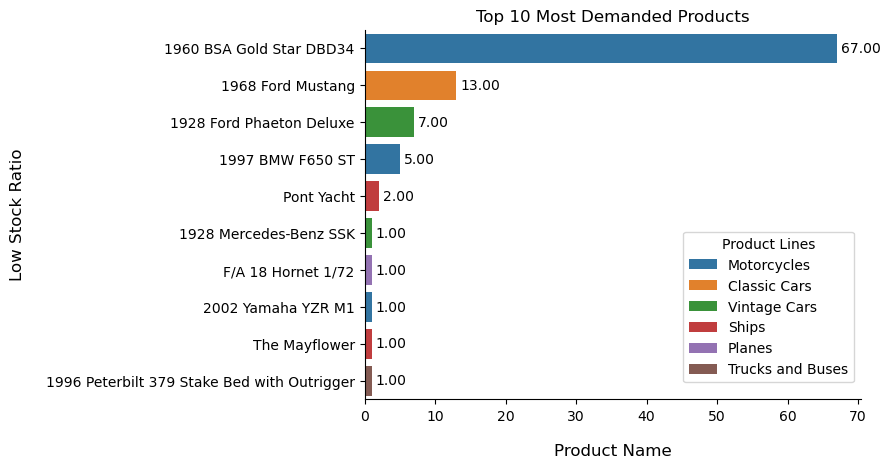

In [29]:
#Create a barplot
sns.barplot(data= df_2, 
            y='productName', 
            x='low_stock_ratio', 
           hue='productLine',            
           )

#Add labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', padding=3, fmt='%.2f')

#Customize the plot appearance
sns.despine(top=True, right=True)

#Customize labels and title
plt.xlabel('Product Name', labelpad=15, fontsize=12)
plt.ylabel('Low Stock Ratio', labelpad=15, fontsize=12)
plt.title('Top 10 Most Demanded Products')
plt.xticks(visible=True)

#Customize legend
plt.legend(title='Product Lines', bbox_to_anchor=(1,0.25), loc='center right')

#Improve layout
plt.tight_layout
plt.show()

**Summary**
___
The notable insights from the analysis above affirms the following;

**1. More Order Products**
- `1960 BSA Gold star DBD34` has a higher low stock ratio. This indicates that the number of times this product is ordered exceeds the exisiting stock levels. Inventory team should therefore ensure that there is sufficient buffer stock, and orders are placed on time to ensure that customer needs are met promptly whenever need arises.
- Additionally, `1968 Ford Mustand`, `1928 Ford Phaeton Deluxe` and `1997 BMW F650 ST` are also among the products with high low stock ratio that require constant stocktaking to ensure that low stock products are updated periodically to avoid instances of stockouts that could significantly affect the profit margins.
  
The above mentioned products are therefore highly recommended for more orders as backed up by their high low stock ratio

**2. Less Order Products**
There is a notably low demand for productlines that are under `Trucks and Buses`. Customers have a low propensity to spend on these products and as shown above, `1996 Peterbilt 379 Stake Bed with Outrigger` has a lower low stock ratio. Other products such as `1928 Mercedes-Benz SSK`, `F/A 18 Hornet 1/72`, `2002 Yamaha YZR M1`, and `The Mayflower`, have a significantly lower low stock ratio making them unfavourable for constant stocking. Such products should be ordered on request to avoid overall cost of managing inventory within the business such as; holding, storage, insurance and obsolescence costs.

## Marketing Strategies and Consumer Behavior
___

Our main objective for this section is to determine customers who bring much profits to the store and those who bring less profit. This information is key in helping the company to adopt marketing and communication strategies that fit the differenct consumer behaviors. Customers that are important to the company require __customer loyalty programs__ that will reward them and motivate their behavior to continue staying loyal to the brand. On the flip side, the less engaged customers require __customer campaign programs__ such as discounts, giveaways, testimonials, etc. to increase their engagement that will drive sales, thus profitability.

In [33]:
query_profit = '''
WITH
customer_profits AS (
    SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON od.orderNumber = o.orderNumber
 GROUP BY o.customerNumber
)

SELECT c.contactLastName || " " || c.contactFirstName AS name,
           c.city, c.country, cp.profit
  FROM customers c
  JOIN customer_profits cp
    ON c.customerNumber = cp.customerNumber
 ORDER BY cp.profit DESC
 LIMIT 5;'''

df_3a = pd.read_sql_query(query_profit, conn)

query_profit = '''
WITH
customer_profits AS (
    SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON od.orderNumber = o.orderNumber
 GROUP BY o.customerNumber
)

SELECT c.contactLastName || " " || c.contactFirstName AS name,
           c.city, c.country, cp.profit
  FROM customers c
  JOIN customer_profits cp
    ON c.customerNumber = cp.customerNumber
 ORDER BY cp.profit
 LIMIT 5;'''

df_3b = pd.read_sql_query(query_profit, conn)

print('Top 5 customers')
print('---' * 30)
print(df_3a)
print('\n')
print('Bottom 5 customers')
print('---' * 30)
print(df_3b)




Top 5 customers
------------------------------------------------------------------------------------------
              name        city    country     profit
0    Freyre Diego       Madrid      Spain  326519.66
1     Nelson Susan  San Rafael        USA  236769.39
2       Young Jeff         NYC        USA   72370.09
3   Ferguson Peter   Melbourne  Australia   70311.07
4  Labrune Janine       Nantes     France   60875.30


Bottom 5 customers
------------------------------------------------------------------------------------------
              name        city country    profit
0       Young Mary    Glendale     USA   2610.87
1    Taylor Leslie  Brickhaven     USA   6586.02
2   Ricotti Franco       Milan   Italy   9532.93
3  Schmitt Carine       Nantes  France  10063.80
4    Smith Thomas       London      UK  10868.04


SUMMARY
___

- **VIP Customers**
  
From the above analysis, we've been able to write a query that pulls top 5 customers that are more valuable to the store based on their profitability margins. `Fyeyre Diego` tops the list as the highest profitable customer followed by `Nelson Susan` all the way to `Labrune Janine`. The store should be intentional in their marketing and communication strategies to ensure that loyalty programs such cashbacks and discount programs, rewards, personalized offers amonth others.  This will ensure that the customer loyalty is sustained and profit margins realized.

- **Least Engaged Customers**

`Smith Thomas` has the least profitability margin in the store among other customers such as `Schmitt Carine` and `Young Mary`. The company should therefore focus on campaign programs that will provoke a propensity to spend behavior on these segment of clients and aim at transitioning them from less engaged to valuable customers for the store. 

## Customer Lifetime Value Analysis
___

Every company's goal is to retain its customers and acquire new ones. The idea behind this strategy is determined by the **customer lifetime value analysis (LTV)**. The LTV is determined by calculating the average profit made by the customers. The value we get for LTV determines the cost the company is willing to incur inorder to acquire new customers. Below we are going to calculate the LTV by determining the average profit of the store.

In [37]:
query_ltv = '''
WITH
customer_profits AS (
    SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON od.orderNumber = o.orderNumber
 GROUP BY o.customerNumber
),

customer_details_profits AS (
     
    SELECT c.contactLastName, c.contactFirstName,
           c.city, c.country, cp.profit
      FROM customers c
      JOIN customer_profits cp
        ON c.customerNumber = cp.customerNumber
     ORDER BY cp.profit
     LIMIT 5

)

SELECT ROUND(AVG(profit), 2) AS customer_lifetime_value
  FROM customer_profits;'''

df_4 = pd.read_sql_query(query_ltv, conn)
df_4

,customer_lifetime_value
0,39039.59


Summary
___
From the above analysis, the store's ltv is **$39039.59**. This means that every customer generates 39039.59 dollars during their lifetime with the store. What this means to the company is that, the higher the number of customers onboarded to the store the higher the customer lifetime value. In practical terms; if the store decides acquire 20 more clients then it means the lifetime value will increase 20 times more. LTV is a very important indicator to give predictions on the amount of investment the company should pump in acquiring new customers. It's an opportunity cost in the long-run, because the value of foregone alternative is the increase of profit margins as a result of onboarding new customers.

### Average Contribution of Customer Lifetime Value

We decided to go a step further to determine the contribution of each customers profitability margins to the customer lifetime value. The significance of this analysis is to help the company segement the customers based on the profitability margins, and by extension formulate target marketing strategies with an aim of increasing buyer spending and by extension upscaling the overall customer lifetime value.

In [41]:
query_ltv_each = '''
SELECT c.customerName,
       ct.customerNumber,
       ct.profit AS customer_lifetime_value,
       
       CASE
       
           WHEN ct.profit >= 39039.59 THEN 'VIP'
           ELSE 'Less Engaged'
       END AS ltv_status
       
  FROM
       (SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
          FROM products p
          JOIN orderdetails od
            ON p.productCode = od.productCode
          JOIN orders o
            ON od.orderNumber = o.orderNumber
         GROUP BY o.customerNumber
       ) ct
   JOIN customers c
     ON ct.customerNumber = c.customerNumber  
  ORDER BY customer_lifetime_value DESC;'''

df_5 = pd.read_sql_query(query_ltv_each, conn)
df_5

,customerName,customerNumber,customer_lifetime_value,ltv_status
0,Euro+ Shopping Channel,141,326519.66,VIP
1,Mini Gifts Distributors Ltd.,124,236769.39,VIP
2,Muscle Machine Inc,151,72370.09,VIP
3,"Australian Collectors, Co.",114,70311.07,VIP
4,La Rochelle Gifts,119,60875.30,VIP
...,...,...,...,...
93,"Double Decker Gift Stores, Ltd",489,10868.04,Less Engaged
94,Atelier graphique,103,10063.80,Less Engaged
95,Frau da Collezione,473,9532.93,Less Engaged
96,Auto-Moto Classics Inc.,198,6586.02,Less Engaged


In [42]:
#Getting the value count for the two variables in ltv_status column
ltv_status_counts = df_5['ltv_status'].value_counts()
ltv_status_counts

ltv_status
Less Engaged    62
VIP             36
Name: count, dtype: int64

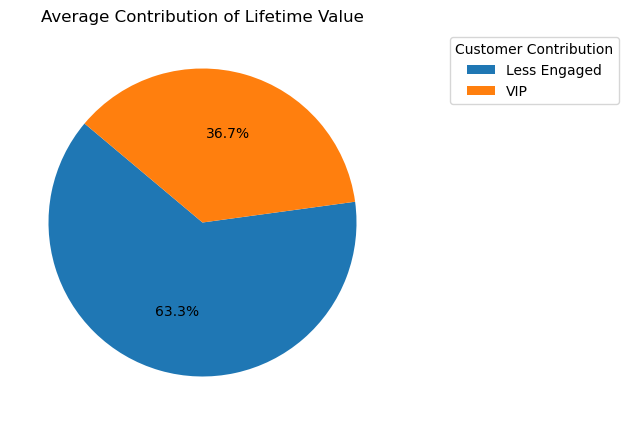

In [43]:
# Create Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(ltv_status_counts,        
        autopct='%1.1f%%', 
        startangle=140, 
       )

# Add a legend
plt.legend(ltv_status_counts.index, title="Customer Contribution", loc="upper right", bbox_to_anchor=(1.6, 1))

# Title
plt.title("Average Contribution of Lifetime Value", fontsize=12)

# Show Chart
plt.show()

**Summary**
____
From the above analysis and visualization, we can see that only 36.7% of the customer's profit margins are above the customer lifetime value. These customers are considered very important to the store because thier contribution to profit margins is tremendous. On the flip side, 63% of the customers profitability margins are below the customer lifetime value. These customers are considered less engaging in regards to contributing to general revenue margins of the store.

In conclusion, in as much as the the analysis earlier on indicated the need to acquire new customers with the aim of increasing general customer lifetime value, the store should as well focus on the existing customers in order to increase the revenue margins. Marketing strategies such loyalty programs and customer campaigns should be designed with the aim of motivating the existing client base to increase their propensity to spend. This will increase the customer lifetime value from **$39039.59** to higher digits that is valuable to the store.

## Profitable Product Lines

The store has a total of seven different product lines i.e;
  - Classic Cars
  - Motorcycles
  - Planes
  - Ships
  - Trains
  - Trucks and Buses
  - Vintage Cars

We will analyse the profitability of customers preference to products belonging to the above product lines and determine which productlines are the most profitable.

In [47]:
query_line = '''
WITH
profitable_line_table AS (
SELECT p.productCode, p.productLine, 
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM orders o
  JOIN orderdetails od
    ON o.orderNumber = od.orderNumber
  JOIN products p
    ON od.productCode = p.productCode
 GROUP BY p.productCode
 ORDER BY profit
)

SELECT plt.productCode, plt.productLine, plt.profit
FROM profitable_line_table plt
WHERE plt.profit = (
    SELECT MAX(profit)
    FROM profitable_line_table plt2
    WHERE plt2.productLine = plt.productLine
)
ORDER BY plt.profit DESC;'''

df_6 = pd.read_sql_query(query_line, conn)
df_6

,productCode,productLine,profit
0,S18_3232,Classic Cars,135996.78
1,S10_4698,Motorcycles,81031.30
2,S18_2795,Vintage Cars,68423.18
3,S18_1662,Planes,64599.11
4,S24_2300,Trucks and Buses,55655.47
5,S700_2047,Ships,37570.91
6,S32_3207,Trains,28835.51


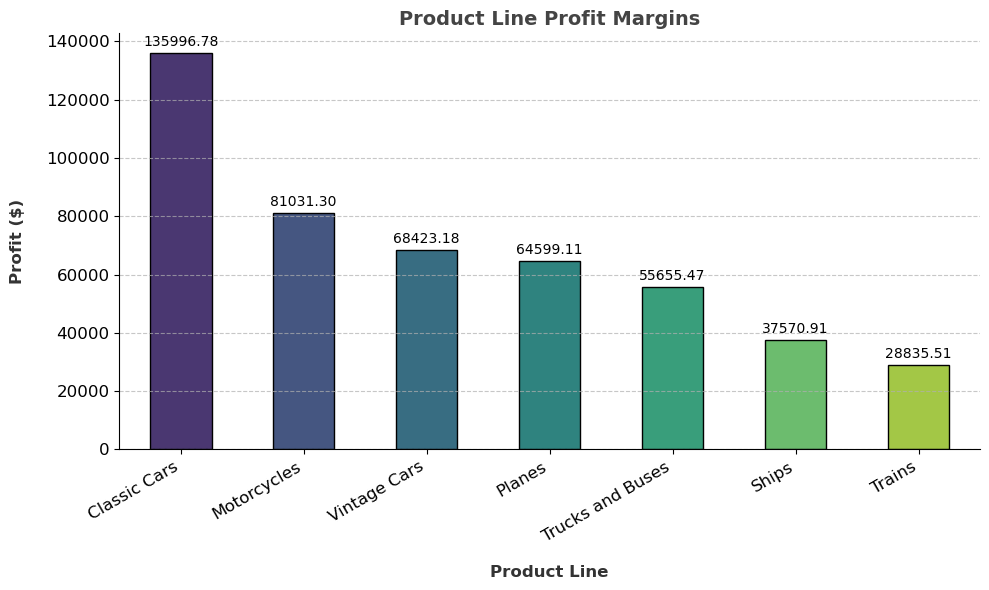

In [48]:
# Set figure size
plt.figure(figsize=(10, 6))

# Use a more appealing color palette
sns.barplot(
    data=df_6, 
    y='profit', 
    x='productLine',
    hue='productLine',
    legend=False,
    width=0.5,  # Adjust bar width
    palette="viridis",  # Use an attractive color theme
    edgecolor="black"  # Add borders for better contrast
)

# Add labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, label_type='edge', padding=3, fmt='%.2f', fontsize=10, color='black')

# Customize the plot appearance
sns.despine(top=True, right=True)  # Remove top & right borders
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle grid lines

# Customize labels and title
plt.xlabel('Product Line', labelpad=15, fontsize=12, fontweight='bold', color='#333')
plt.ylabel('Profit ($)', labelpad=15, fontsize=12, fontweight='bold', color='#333')
plt.title('Product Line Profit Margins', fontsize=14, fontweight='bold', color='#444')

# Rotate x-labels for better readability
plt.xticks(rotation=30, fontsize=12, ha='right')  # Rotate & align right
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

**Summary**
___
From the analysis above, we can see that customers prefer `Classic Cars` product line that has a total profitability of **$135996.78**. `Motorcyles` and `Vinatage Cars` follow the list to form the top 3 profitable product lines in the store. There is a significantly low preference for products belonging to the `Trains` product line. This is evidence by the low profitability of about **28835.51 dollars**. 

With a combined total of **$93,226.38** (less than the profit of Classic Cars), `Ships` and `Trucks and Buses` are as well not profitable product lines in the store. In conclusion, the store should build on the strong brands that belong to Classic Cars, Motorcycles and Vintage Cars in order to realize increased sales that will increase the projections of their revenue margins. They should also cut on ordering costs on brands belonging to Trains, Ships and Trucks and Buses because they are less profitable.

## Sales Team Portfolio

The most important resource in a company is the human resource. They play a significant role in helping an organization to achieve thier goals. A company should develop a framework of tapping into exceptional talents through reward systems and incentives. Motivation has tremendously proven to be a recipe for accelerating best perfomance. Below, we're going to analyse the sales team performance and recommend the employees with the best portfolio to qualify for rewards.

In [52]:
query_employee = '''
WITH
customer_profits AS (
    SELECT o.customerNumber,
       ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON od.orderNumber = o.orderNumber
 GROUP BY o.customerNumber
)

SELECT e.lastName || ' ' || e.firstName AS name,
       e.jobTitle,
       c.country,
       c.state,
       profit
  FROM customers c
  JOIN customer_profits cp
    ON c.customerNumber = cp.customerNumber
  JOIN employees e
    ON c.salesRepEmployeeNumber = e.employeeNumber
 ORDER BY profit DESC;'''

df_7 = pd.read_sql_query(query_employee, conn)
df_7.head(10)

,name,jobTitle,country,state,profit
0,Hernandez Gerard,Sales Rep,Spain,None,326519.66
1,Jennings Leslie,Sales Rep,USA,CA,236769.39
2,Tseng Foon Yue,Sales Rep,USA,NY,72370.09
3,Fixter Andy,Sales Rep,Australia,Victoria,70311.07
4,Hernandez Gerard,Sales Rep,France,None,60875.30
5,Nishi Mami,Sales Rep,Singapore,None,60477.38
6,Bott Larry,Sales Rep,UK,None,60095.86
7,Marsh Peter,Sales Rep,New Zealand,None,60013.99
8,Vanauf George,Sales Rep,USA,NY,58669.10
9,Jennings Leslie,Sales Rep,USA,CA,55931.37


**Summary**
___
Above, we can see the top 10 best employees with quality portfolio. `Hernandez Gerard` tops the list with a portfolio of **$326519.66**. To motivate the top performers, the company should come up with reward systems such as, but not limited to;
- **Monetory Rewards**
  -salary raise
  - profit sharing
  - performance based bonus
- **Tangiable Rewards**
  - gift cards
  - trophy
- **Experiential Rewards**
  - paid vacation
  - VIP event tickets

## Year-Over-Year Profit Margins

Observing Year-Over-Year performance allows for gauging if a company's financial performance is improving, static or worsening. Below we are going to perform Month-Over-Month; Year-Over-Year sales performance to get insights on the revenue patterns between 2003-2005

In [56]:
query_year = '''
WITH
profitable_customers_table AS (
SELECT o.customerNumber, 
    ROUND(SUM(od.quantityOrdered * (od.priceEach - p.buyPrice)), 2) AS profit
  FROM products p
  JOIN orderdetails od
    ON p.productCode = od.productCode
  JOIN orders o
    ON od.orderNumber = o.orderNumber
  JOIN customers c
    ON o.customerNumber = c.customerNumber
 GROUP BY o.customerNumber
)

SELECT CAST(SUBSTR(paymentDate, 1,4) AS INTEGER) AS year,
       CAST(SUBSTR(paymentDate, 6,7) AS INTEGER) AS month,
SUM(profit) AS total_profit
  FROM payments pmt
  JOIN profitable_customers_table pct
    ON pct.customerNumber = pmt.customerNumber
 GROUP BY year, month
 ORDER BY year, month;'''

df_8 = pd.read_sql_query(query_year, conn)
df_8

,year,month,total_profit
0,2003,1,101098.23
1,2003,2,418884.86
2,2003,3,240660.84
3,2003,4,422823.29
4,2003,5,299343.76
5,2003,6,181896.41
6,2003,7,581553.73
7,2003,8,421537.58
8,2003,9,160106.16
9,2003,10,652280.92


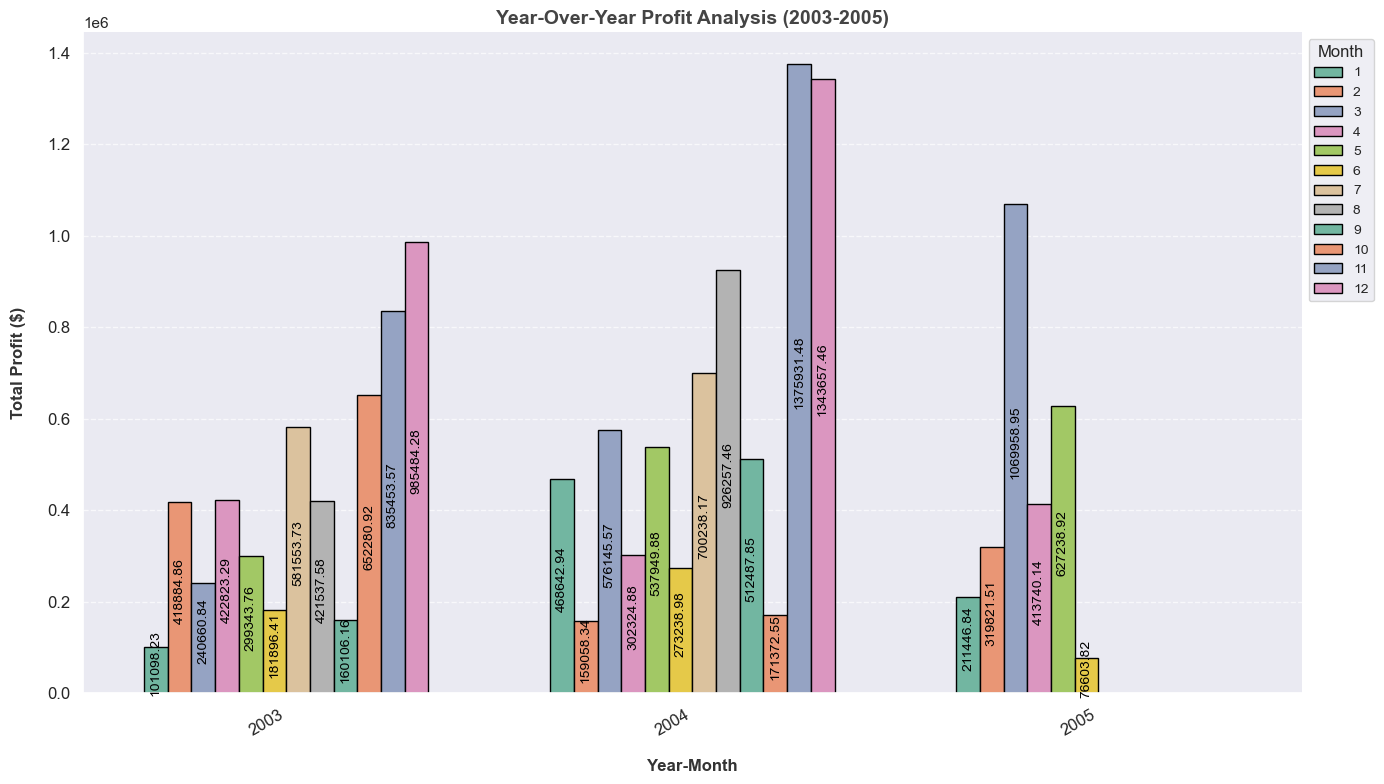

In [57]:
# Set figure size
plt.figure(figsize=(14, 8))

# Adjust theme
sns.set_theme(style='dark', palette='pastel')

# Use a more appealing color palette
sns.barplot(
    data=df_8, 
    y='total_profit', 
    x='year',
    hue='month',
    dodge=True,
    width=0.7,  # Adjust bar width
    palette="Set2",  # Use an attractive color theme
    edgecolor="black"  # Add borders for better contrast
)

# Add labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, label_type='center', padding=5, fmt='%.2f', fontsize=10, color='black', rotation=90)

# Customize the plot appearance
sns.despine(top=True, right=True)  # Remove top & right borders
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle grid lines

# Customize labels and title
plt.xlabel('Year-Month', labelpad=15, fontsize=12, fontweight='bold', color='#333')
plt.ylabel('Total Profit ($)', labelpad=15, fontsize=12, fontweight='bold', color='#333')
plt.title('Year-Over-Year Profit Analysis (2003-2005)', fontsize=14, fontweight='bold', color='#444')

# Include legend
plt.legend(title='Month', bbox_to_anchor=(1,1), loc='upper left', fontsize=10)

# Rotate x-labels for better readability
plt.xticks(rotation=30, fontsize=12, ha='right')  # Rotate & align right
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

**Summary**
___
We observe the highest profit generated was in `2004` around the month of November. The store managed to attain a record profit of **$1375931.48**. Even though there was a slight decline (a margin of 2.34%) in profit margins in the following month of December , the profits in that month were still high compared to other years __(1343657.46)__.

The lowest profit the store has ever generated was in the year `2003`; month of `January`. The profit attained during that month was **$101098.23**. We also observe an interesting pattern in regards to months with the highest sales. Putting to perspective the year `2003` and `2004`, the highest recorded profits are in the last two months of the year i.e. `November` and `December`. This is an important trend that the sales and marketing team can leaverage on in order to maximize sales during the peak seasons.

## Conclusion

We've done a conclusive analysis to try and uncover some insights that can provide valuable information to help Scale Model Cars store make smarter decisions. We categorised our analysis into 6 different varialbes that are key performance indicators and gave recommendations on further course of actions. The variables include;
- **Stock Order Quantity**

We found out that the products with high low stock ratio (mostly demanded) that should be ordered more frequently include; `1960 BSA Gold Star DBD34`, `1968 Ford Mustang`, `1928 Ford Phaeton Deluxe`. On the other hand, products that are slow moving and have no need of frequent orders inclued; `1996 Peterbilt 379 Stake Bed with Outrigger`, `The Mayflower` and `2002 Yamaha YZR M1`.

- **Marketing Strategies and Consumer Behavior**

We found out the most valuable customers generating higher profits against the less engaged customers generating relatively lower profits. From this findings, we recommended a target marketing strategy to offer loyalty programs to the `VIP` customers, and formulate robust customer campaigns to increase the propensity to spend for the `least engaged` customers

- **Customer Lifetime Value Analysis**

We also calculated the average profit each customer contributes to the store. The findings established the need to recruit new customers to the store in the sense that, the highers the customer lifetime value, the higher the revenues.

- **Profitable Product Lines**

We also did an analysis to establish the most profitable product lines, and from our findings the top 3 valuable product lines include; `Classic Cars`, `Motorcycles`, and `Vintage Cars`. On the other hand, our analysis established that the most unprofitable product line is `Trains`

- **Sales Team Portfolio**

Our analysis further determined the employees portfolios using the profit generated as the threshold. Our finding displayed the top 10 best performing employees with quality portfolios. We also recommended a reward system for motivating the best employees to perform even better.

- **Year-Over-Year Profit Margins**

We also established a profit margin trend between 2003 to part of 2005. We found out that `2004` was the year that recorded the highest profit. We also discovered an interesting pattern of peak season during the months of November and December.